In [2]:
#first importing all the necessary libraries that we need
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense,LSTM
import yfinance as yf
plt.style.use('fivethirtyeight')


In [32]:
# Get the stock quote i.e the stock data
# df=web.DataReader('YESBANK ',data_source="yahoo",start='2008-01-01',end='2020-08-31')
df = yf.download('AAPL', start='2013-01-01',end='2021-06-26')
print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-12-31   18.233213   19.121429   18.178572   19.006071   16.488508   
2013-01-02   19.779285   19.821428   19.343929   19.608213   17.010899   
2013-01-03   19.567142   19.631071   19.321428   19.360714   16.796177   
2013-01-04   19.177500   19.236786   18.779642   18.821428   16.328323   
2013-01-07   18.642857   18.903570   18.400000   18.710714   16.232281   
...                ...         ...         ...         ...         ...   
2021-06-21  130.300003  132.410004  129.210007  132.300003  132.300003   
2021-06-22  132.130005  134.080002  131.619995  133.979996  133.979996   
2021-06-23  133.770004  134.320007  133.229996  133.699997  133.699997   
2021-06-24  134.449997  134.639999  132.929993  133.410004  133.410004   
2021-06-25  133.460007  133.889999  132.809

In [4]:
# Exploring the data
print(df.head())
print(df.tail())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-12-31  18.233213  19.121429  18.178572  19.006071  16.488508  659492400
2013-01-02  19.779285  19.821428  19.343929  19.608213  17.010899  560518000
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.796177  352965200
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.328323  594333600
2013-01-07  18.642857  18.903570  18.400000  18.710714  16.232281  484156400
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-06-22  132.130005  134.080002  131.619995  133.979996  133.979996   
2021-06-23  133.770004  134.320007  133.229996  133.699997  133.699997   
2021-06-24  134.449997  134.639999  132.929993  133.410004  133.410004   
2021-06-25  133.460007  133.889999  132.809998  133.110001  133.110001   
2021-06-28  133.4

In [33]:
# The no. of rows and columns in the dataset
df.shape

(2137, 6)

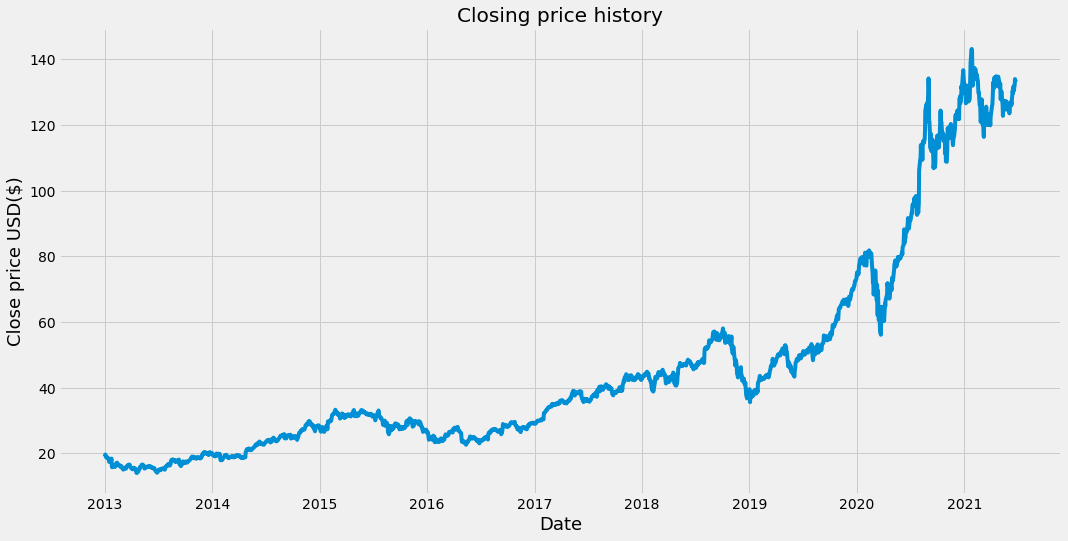

In [34]:
# Visualing the data

plt.figure(figsize=(16,8))
plt.title("Closing price history")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD($)',fontsize=18)
plt.show()

In [35]:
# creating a new dataframe with only the "Close" column
data=df.filter(['Close'])
dataset=data.values
dataset

array([[ 19.00607109],
       [ 19.60821342],
       [ 19.36071396],
       ...,
       [133.69999695],
       [133.41000366],
       [133.11000061]])

In [8]:
# Selecting the no. of rows to train the model on
# training_size=math.ceil(len(dataset)*0.8)
# training_size

1711

In [36]:
#scaling the data 
# It will make our data in the range of [0,1]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.03914924],
       [0.04380933],
       [0.04189388],
       ...,
       [0.92678722],
       [0.92454291],
       [0.92222113]])

In [37]:
#creating the training dataset i.e, scaled training dataset
train_data=scaled_data #[:training_size,:]

#rest data will be our testing dataset
# test_data=scaled_data[training_size-60:,:]

train_data.shape#test_data.shape

(2137, 1)

In [38]:
# Split the data into x_train and y_train datasets
# i.e, independent and dependent training features
x_train=[]
y_train=[]
for i in range(60,len(scaled_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if(i<=61):
        print(x_train)
        print(y_train)
        print()

[array([0.03914924, 0.04380933, 0.04189388, 0.03772025, 0.03686341,
       0.03725313, 0.0349839 , 0.03675563, 0.03586838, 0.03074117,
       0.02636576, 0.03194073, 0.03099821, 0.03025747, 0.03157589,
       0.03412982, 0.01657569, 0.01364032, 0.0163905 , 0.0187233 ,
       0.01832529, 0.01795492, 0.01743805, 0.01431474, 0.01860446,
       0.01846902, 0.02147349, 0.02334195, 0.02471012, 0.02138504,
       0.02113904, 0.02102296, 0.01924571, 0.01919871, 0.01611963,
       0.01534846, 0.01666137, 0.01444741, 0.01615279, 0.01493663,
       0.01406045, 0.0110394 , 0.00815932, 0.01122458, 0.00970992,
       0.0110698 , 0.0113849 , 0.01308475, 0.01047554, 0.01045343,
       0.0116005 , 0.01468511, 0.01801849, 0.01767853, 0.01701239,
       0.01719205, 0.01972941, 0.02019099, 0.01951658, 0.01701239])]
[0.014408713082739541]

[array([0.03914924, 0.04380933, 0.04189388, 0.03772025, 0.03686341,
       0.03725313, 0.0349839 , 0.03675563, 0.03586838, 0.03074117,
       0.02636576, 0.03194073, 0.0

In [39]:
#convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [40]:
#reshape the data to 3-dimensional since our model requires 3d data values
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)
print(scaled_data.shape)

(2077, 60, 1)
(2137, 1)


In [41]:
#build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [43]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')
# Train the model
model.fit(x_train,y_train,batch_size=60,epochs=5)

Epoch 1/5
35/35 [==============================] - 8s 58ms/step - loss: 0.0372
Epoch 2/5
35/35 [==============================] - 2s 54ms/step - loss: 6.8171e-04
Epoch 3/5
35/35 [==============================] - 2s 53ms/step - loss: 4.3815e-04
Epoch 4/5
35/35 [==============================] - 2s 62ms/step - loss: 3.7324e-04
Epoch 5/5
35/35 [==============================] - 2s 54ms/step - loss: 4.0476e-04


In [91]:
training_size=-300
test_data=scaled_data[training_size:]
print(test_data.shape)
#create the testing dataset
x_test=[]
y_test=dataset[training_size]
y_test=dataset[training_size:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


(300, 1)


In [90]:
#convert the data to a numpy array
x_test=np.array(x_test)
#reshaping the data to be 3-d
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(240, 60, 1)

In [87]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [88]:
#get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))
rmse
# rmse=np.sqrt(((predictions-y_test)**2),mean())


ValueError: operands could not be broadcast together with shapes (240,1) (300,1) 

In [92]:
#plot the data
train=data[:training_size]
valid=data[training_size:]
valid['Predictions']=predictions

ValueError: Length of values (240) does not match length of index (300)

KeyError: "['Predictions'] not in index"

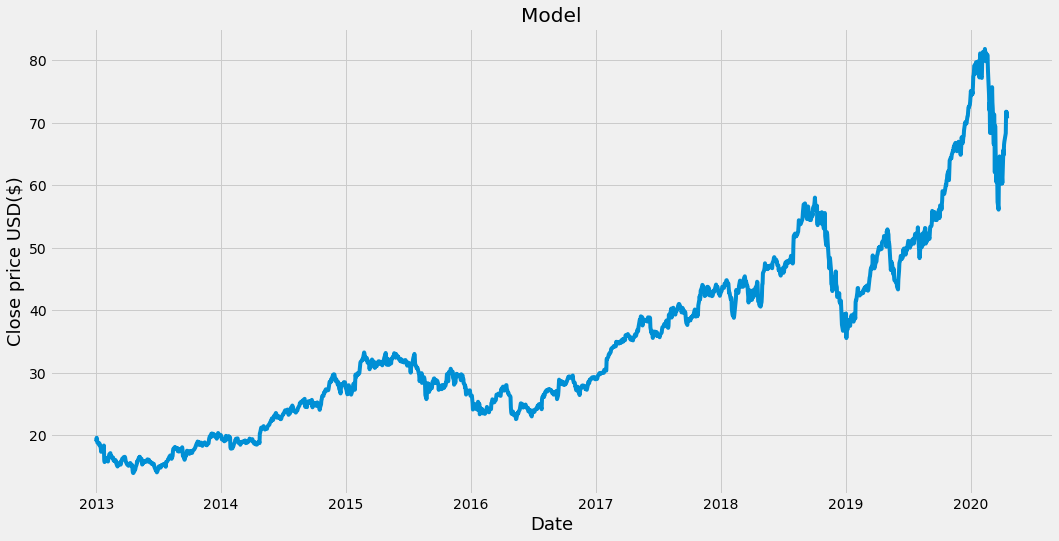

In [93]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'],loc='lower right')
plt.show()

In [25]:
#the numerical data
valid

,Close,Predictions
Date,,
2019-10-17,58.820000,57.212063
2019-10-18,59.102501,57.490086
2019-10-21,60.127499,57.757618
2019-10-22,59.990002,58.050983
2019-10-23,60.794998,58.342430
...,...,...
2021-06-22,133.979996,127.573975
2021-06-23,133.699997,128.108551
2021-06-24,133.410004,128.652084


In [45]:
# Now lets see our model is working properly by predicting the closing stock of one day ahead
#get the quote
# apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2021-06-25',end='2021-07-01')
apple_quote=yf.download('AAPL',period='5d')
#create a new dataframe
new_df=apple_quote.filter(['Close'])
print(new_df)

[*********************100%***********************]  1 of 1 completed
                 Close
Date                  
2021-06-24  133.410004
2021-06-25  133.110001
2021-06-28  134.779999
2021-06-29  136.330002
2021-06-30  136.960007


In [48]:
#now taking the last 60 day closing price values and converting the dataframe
# to an ARRAY
last_60=scaled_data[-60:]
last_60

array([[0.84397792],
       [0.86642158],
       [0.86882071],
       [0.88189996],
       [0.90093836],
       [0.92136981],
       [0.90774888],
       [0.93243679],
       [0.91386279],
       [0.93297859],
       [0.9303473 ],
       [0.93560989],
       [0.92222113],
       [0.9252394 ],
       [0.91316629],
       [0.9315856 ],
       [0.93468122],
       [0.93212728],
       [0.92585855],
       [0.92508459],
       [0.90945151],
       [0.91780973],
       [0.88151297],
       [0.88344783],
       [0.8961401 ],
       [0.89977752],
       [0.87377379],
       [0.86649899],
       [0.84219788],
       [0.85922413],
       [0.87841729],
       [0.86928504],
       [0.85829541],
       [0.85705717],
       [0.87733381],
       [0.86278415],
       [0.87570858],
       [0.87416077],
       [0.87377379],
       [0.86162326],
       [0.85643802],
       [0.85388407],
       [0.85992063],
       [0.84815709],
       [0.86634417],
       [0.86642158],
       [0.87292247],
       [0.875

In [49]:
# now scaling the data to be between 0 and 1
# last_60_scaled=scaler.transform(last_60)
last_60_scaled=scaled_data[-60:]
last_60_scaled

array([[0.84397792],
       [0.86642158],
       [0.86882071],
       [0.88189996],
       [0.90093836],
       [0.92136981],
       [0.90774888],
       [0.93243679],
       [0.91386279],
       [0.93297859],
       [0.9303473 ],
       [0.93560989],
       [0.92222113],
       [0.9252394 ],
       [0.91316629],
       [0.9315856 ],
       [0.93468122],
       [0.93212728],
       [0.92585855],
       [0.92508459],
       [0.90945151],
       [0.91780973],
       [0.88151297],
       [0.88344783],
       [0.8961401 ],
       [0.89977752],
       [0.87377379],
       [0.86649899],
       [0.84219788],
       [0.85922413],
       [0.87841729],
       [0.86928504],
       [0.85829541],
       [0.85705717],
       [0.87733381],
       [0.86278415],
       [0.87570858],
       [0.87416077],
       [0.87377379],
       [0.86162326],
       [0.85643802],
       [0.85388407],
       [0.85992063],
       [0.84815709],
       [0.86634417],
       [0.86642158],
       [0.87292247],
       [0.875

In [52]:
# Now creating a dataset of this last 60 day
X_test=[last_60_scaled]
#Converting it into numpy array
X_test=np.array(X_test)
#reshaping the array to be 3 dimensional
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)

(1, 60, 1)


In [53]:
#Now calculating the predicted scale price
pred=model.predict(X_test)
print(pred)
#undoing the scaling
pred=scaler.inverse_transform(pred)
print(pred)

[[0.91876036]]
[[132.66281]]


In [54]:
print(new_df)

                 Close
Date                  
2021-06-24  133.410004
2021-06-25  133.110001
2021-06-28  134.779999
2021-06-29  136.330002
2021-06-30  136.960007


In [55]:
# as we could see above after 25 june theres the 28th june so it is giving 134.799 valid closing price 
# and we got 132.663 which is very close so our model's prediction is very close we can increase it more
# further if we increate the test data or increase the model epoch

In [55]:
# Now lets check if the predicted values match with the actual value or not
# apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2021-01-01',end='2021-01-04')
# apple_quote2

In [56]:
# apple_quote2['Close']
# as we can see the actual price is 129 which is very close to our predicted price 123

## Predicting next 10 days

In [56]:
len(scaled_data)

2137

In [64]:
x_input=scaled_data[-60:].reshape(1,-1)
x_input.shape

(1, 60)

In [65]:
print(X_test.shape)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

(1, 60, 1)


[0.8439779191142494,
 0.8664215793547424,
 0.8688207090856662,
 0.8818999575833132,
 0.9009383557190161,
 0.9213698102571034,
 0.9077488799285965,
 0.9324367940070174,
 0.9138627873689941,
 0.9329785939285314,
 0.9303472979714315,
 0.9356098898856314,
 0.922221125783301,
 0.9252394048142462,
 0.9131662886904656,
 0.931585596571474,
 0.9346812249809265,
 0.9321272784023339,
 0.9258585541142673,
 0.9250845879665771,
 0.9094515109809916,
 0.9178097313046442,
 0.8815129745094681,
 0.8834478308333665,
 0.8961400962571685,
 0.8997775245881349,
 0.8737737853951827,
 0.8664989877785768,
 0.8421978796380197,
 0.8592241311166439,
 0.8784172870546885,
 0.8692850415380187,
 0.8582954071666119,
 0.8570571676118963,
 0.8773338053023148,
 0.8627841510237759,
 0.8757085826737541,
 0.8741607684690278,
 0.8737737853951827,
 0.8616232608475677,
 0.8564380183118749,
 0.8538840717332823,
 0.8599206297951726,
 0.8481570883214027,
 0.866344170930908,
 0.8664215793547424,
 0.8729224698689851,
 0.8759407488999

In [66]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=60
i=0
while(i<10):
    
    if(len(temp_input)>60):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.91876036]
61
1 day input [0.86642158 0.86882071 0.88189996 0.90093836 0.92136981 0.90774888
 0.93243679 0.91386279 0.93297859 0.9303473  0.93560989 0.92222113
 0.9252394  0.91316629 0.9315856  0.93468122 0.93212728 0.92585855
 0.92508459 0.90945151 0.91780973 0.88151297 0.88344783 0.8961401
 0.89977752 0.87377379 0.86649899 0.84219788 0.85922413 0.87841729
 0.86928504 0.85829541 0.85705717 0.87733381 0.86278415 0.87570858
 0.87416077 0.87377379 0.86162326 0.85643802 0.85388407 0.85992063
 0.84815709 0.86634417 0.86642158 0.87292247 0.87594075 0.8680468
 0.87764338 0.90186702 0.89536613 0.89931307 0.91200534 0.90171232
 0.9159524  0.92895418 0.92678722 0.92454291 0.92222113 0.91876036]
1 day output [[0.92200583]]
2 day input [0.86882071 0.88189996 0.90093836 0.92136981 0.90774888 0.93243679
 0.91386279 0.93297859 0.9303473  0.93560989 0.92222113 0.9252394
 0.91316629 0.9315856  0.93468122 0.93212728 0.92585855 0.92508459
 0.90945151 0.91780973 0.88151297 0.88344783 0.8961401  0.89977

In [67]:
lst_output=np.array(lst_output)
print(scaler.inverse_transform(lst_output))

[[132.66282631]
 [133.08218199]
 [133.45438807]
 [133.79091234]
 [134.10042687]
 [134.38942416]
 [134.66290259]
 [134.92443575]
 [135.1767269 ]
 [135.42173228]]


In [68]:
day_new=np.arange(1,61)
day_pred=np.arange(61,71)

In [69]:
print(len(scaled_data),scaled_data)

2137 [[0.03914924]
 [0.04380933]
 [0.04189388]
 ...
 [0.92678722]
 [0.92454291]
 [0.92222113]]


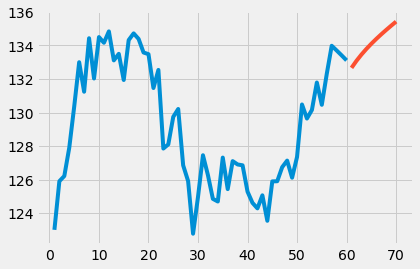

In [70]:
plt.plot(day_new,scaler.inverse_transform(scaled_data[-60:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

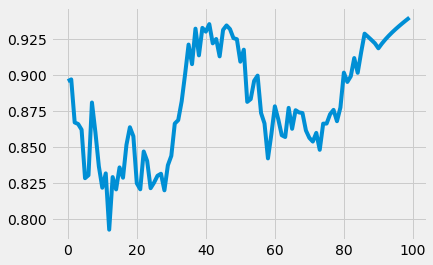

In [71]:
df3=scaled_data.tolist()
df3.extend(lst_output)
plt.plot(df3[-100:])

In [ ]:
apple_quote3=web.DataReader('AAPL',data_source='yahoo',start='2021-05-28',end='2021-06-30')
apple_quote3['Close']

In [ ]:
scaler.inverse_transform(lst_output)